In [ ]:
# %load plot_share.py
# 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

In [2]:
benchmarks = ["110.dynamic-html", "210.thumbnailer", "411.image-recognition", "504.dna-visualisation"]
x = pd.Series(benchmarks)
x = x.str.slice(start=4)
aslr = "aslr1/"
# aslr = "aslr0/"
df_dict = {
    "benchmarks": benchmarks,
    "rss": [],
    "shared-clean": [],
    "shareable anon": [],
    "shareable file-backed": [],
    "not shareable": []
}
for benchmark in benchmarks:
    data_pmap = pd.read_csv(os.path.join("/data/", benchmark + "/", aslr, "diff_input_two_containers/", "pmap_result.csv"))
    data_checkpoint = pd.read_csv(os.path.join("/data/", benchmark + "/", aslr, "diff_input_two_containers/", "checkpoint_result.csv"))
    data_checkpoint.iloc[0] = data_checkpoint.iloc[0].values * 4
    print (data_checkpoint)
#     print (data_pmap)
#     if data_pmap.iloc[0]["rss"] > data_pmap.iloc[1]["rss"]:
#         larger_pmapfile_index = 0
#     else :
#         larger_pmapfile_index = 1
    larger_pmapfile_index = 1
    identical75 = data_checkpoint["75"] / data_pmap.iloc[larger_pmapfile_index]["rss"]
    identical50 = data_checkpoint["50"] / data_pmap.iloc[larger_pmapfile_index]["rss"]

    print ("\n%s:%f , %f\n" % (benchmark, identical75, identical50))
    df_dict["rss"].append(data_pmap.iloc[larger_pmapfile_index]["rss"] / 1024)
    df_dict["shared-clean"].append(data_pmap.iloc[larger_pmapfile_index]["shared_clean"] / 1024)
    df_dict["shareable anon"].append(data_checkpoint.iloc[0]["anonymous pages"] / 1024)
    df_dict["shareable file-backed"].append(data_checkpoint.iloc[0]["file-backed pages"] /1024 - data_pmap.iloc[larger_pmapfile_index]["shared_clean"] /1024)
    df_dict["not shareable"].append(data_pmap.iloc[larger_pmapfile_index]["rss"] / 1024 - data_checkpoint.iloc[0]["identical page"] / 1024)



   identical page   75    50  anonymous pages  file-backed pages
0           10692  980  1864              848               9844

110.dynamic-html:0.038138 , 0.072540

   identical page    75    50  anonymous pages  file-backed pages
0           12732  1584  3396             1236              11496

210.thumbnailer:0.059406 , 0.127363

   identical page    75    50  anonymous pages  file-backed pages
0          147564  1836  3872           102936              44628

411.image-recognition:0.006001 , 0.012656

   identical page    75    50  anonymous pages  file-backed pages
0           17428  1608  3332             1020              16408

504.dna-visualisation:0.033525 , 0.069469



              benchmarks         rss  shared-clean  shareable anon  \
0       110.dynamic-html   25.093750      8.871094        0.828125   
1        210.thumbnailer   26.039062      9.035156        1.207031   
2  411.image-recognition  298.777344     10.417969      100.523438   
3  504.dna-visualisation   46.839844      8.828125        0.996094   

   shareable file-backed  not shareable  
0               0.742188      14.652344  
1               2.191406      13.605469  
2              33.164062     154.671875  
3               7.195312      29.820312  


Text(0, 0.5, 'Memory size (MB)')

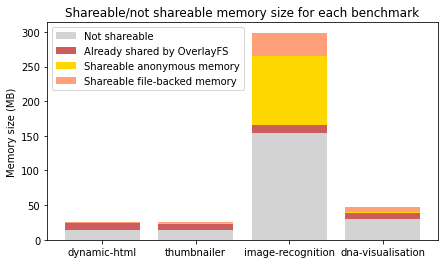

In [3]:
df = pd.DataFrame(df_dict)
print (df)
# df.to_csv("/data/aslr1_share.csv", sep=',',index=False)
# df.to_csv("/data/aslr0_share.csv", sep=',',index=False)

plt.figure(figsize=(7,4))
plt.bar(x, df["not shareable"], color = "lightgrey", label="Not shareable")
plt.bar(x, df["shared-clean"], color = "indianred", bottom = df["not shareable"], label="Already shared by OverlayFS")
plt.bar(x, df["shareable anon"], color = "gold", bottom = df["shared-clean"] + df["not shareable"], label="Shareable anonymous memory")
bar = plt.bar(x, df["shareable file-backed"], color = "lightsalmon", bottom = df["shared-clean"] + df["not shareable"] + df["shareable anon"], label = "Shareable file-backed memory")
# plt.text(benchmark, df["rss"] + 8000, str(df["rss"].values))
# plt.text(benchmarks, df["shareable file-backed"], str(df["shareable file-backed"]))

plt.rcParams['figure.dpi'] = 600
plt.legend(loc="upper left")
plt.title("Shareable/not shareable memory size for each benchmark")
plt.ylabel("Memory size (MB)")

# plt.xticks(rotation=30)
# plt.show()
# plt.savefig('/data/share.jpg')


              benchmarks  perc_not_shareable  perc_shared_clean  \
0       110.dynamic-html           58.390411          35.351806   
1        210.thumbnailer           52.250225          34.698470   
2  411.image-recognition           51.768274           3.486867   
3  504.dna-visualisation           63.664415          18.847469   

   perc_shareable_anon  perc_shareable_file_backed  
0             3.300125                    2.957659  
1             4.635464                    8.415842  
2            33.644933                   11.099925  
3             2.126595                   15.361521  


Text(0, 0.5, 'Percentage')

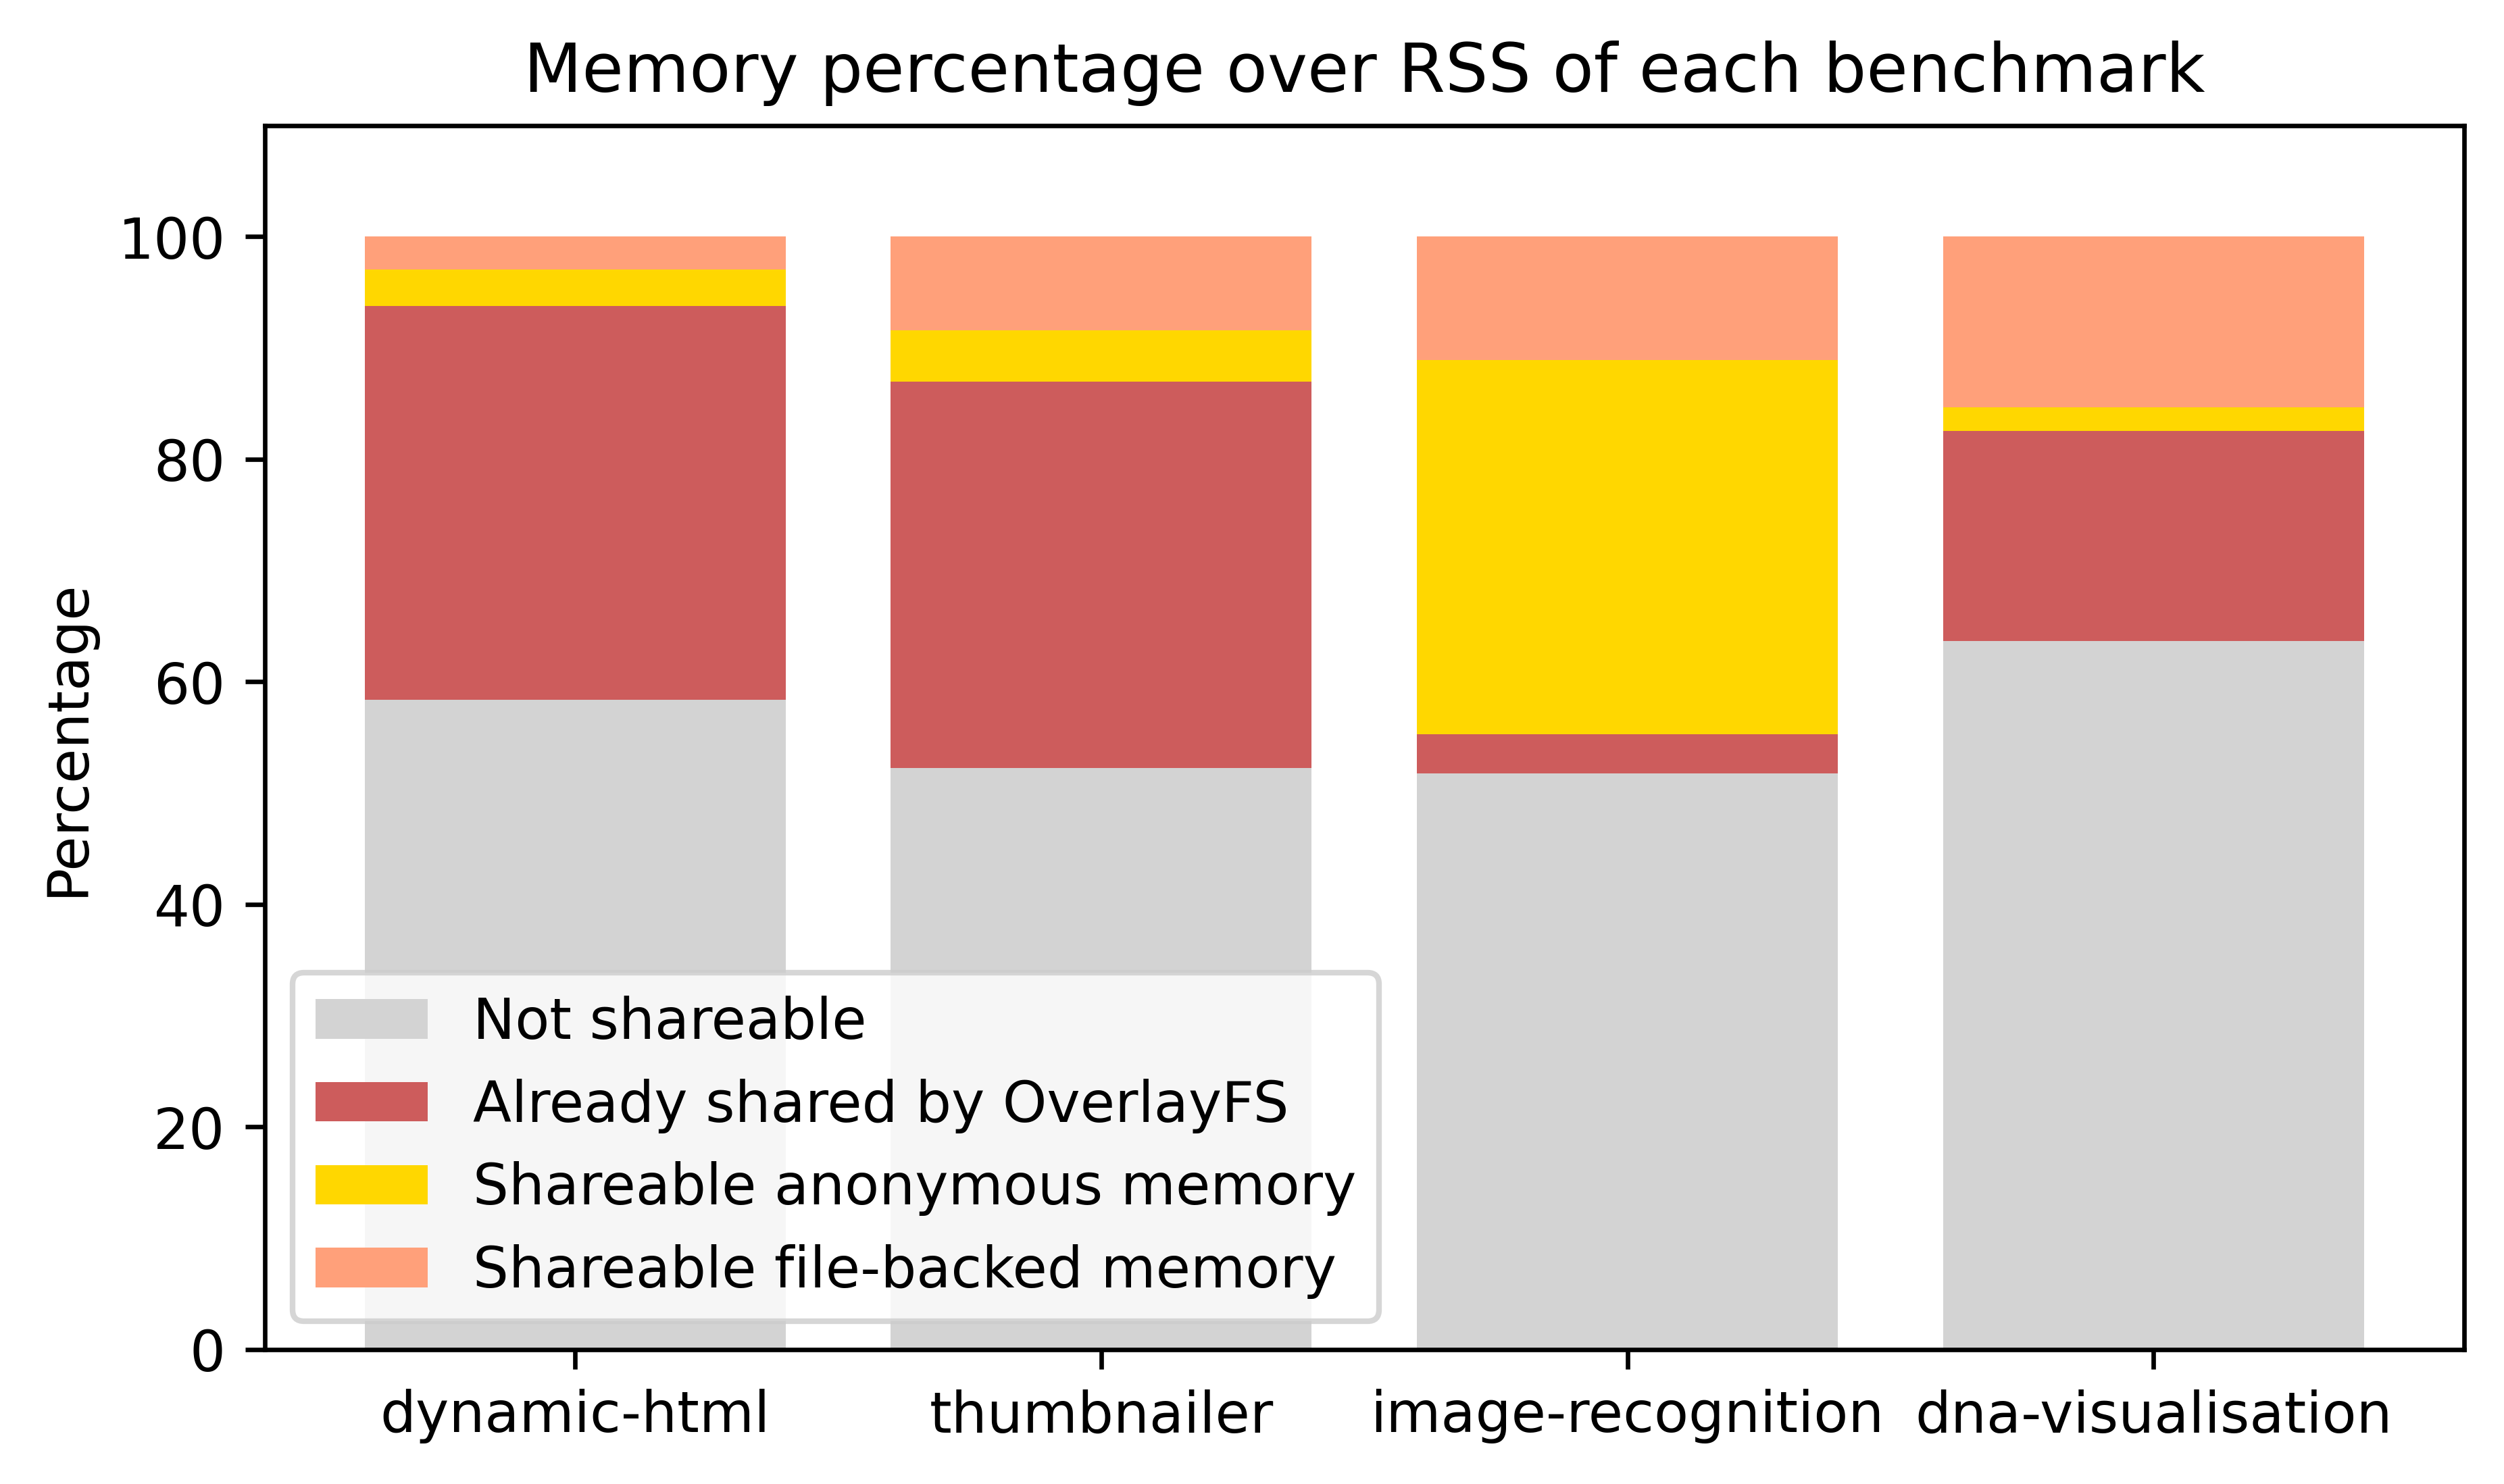

In [4]:
perc_not_shareable = df["not shareable"] / df["rss"] * 100
perc_shared_clean = df["shared-clean"] / df["rss"] * 100
perc_shareable_anon = df["shareable anon"] / df["rss"] * 100
perc_shareable_file_backed = df["shareable file-backed"] / df["rss"] * 100
# print (perc_not_shareable)
# print (perc_shared_clean)
# print (perc_shareable_anon)
# print (perc_shareable_file_backed)

perc_dict = {
    "benchmarks": benchmarks,
    "perc_not_shareable": perc_not_shareable,
    "perc_shared_clean": perc_shared_clean,
    "perc_shareable_anon": perc_shareable_anon,
    "perc_shareable_file_backed": perc_shareable_file_backed
}

perc_df = pd.DataFrame(perc_dict)
# perc_df.to_csv("/data/aslr1_perc.csv", sep=',',index=False)
perc_df.to_csv("/data/aslr0_perc.csv", sep=',',index=False)


print (perc_df)

plt.figure(figsize=(7,4))
plt.bar(x, perc_df["perc_not_shareable"], color = "lightgrey", label="Not shareable")
plt.bar(x, perc_df["perc_shared_clean"], color = "indianred", bottom = perc_df["perc_not_shareable"], label="Already shared by OverlayFS")
plt.bar(x, perc_df["perc_shareable_anon"], color = "gold", bottom = perc_df["perc_shared_clean"] + perc_df["perc_not_shareable"], label="Shareable anonymous memory")
bar = plt.bar(x, perc_df["perc_shareable_file_backed"], color = "lightsalmon", bottom = perc_df["perc_shared_clean"] + perc_df["perc_not_shareable"] + perc_df["perc_shareable_anon"], label = "Shareable file-backed memory")


plt.rcParams['figure.dpi'] = 600
plt.legend()
plt.title("Memory percentage over RSS of each benchmark")
plt.ylim(ymin=0, ymax=110)
plt.ylabel("Percentage")
# plt.savefig('/data/share_perc.jpg')
